# ResNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
resnet50 = ResNet50()
resnet50.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [3]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving lion.jpg to lion.jpg


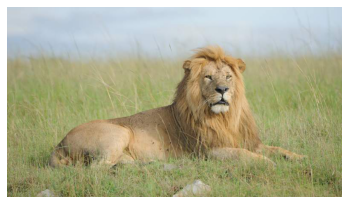

In [5]:
import matplotlib.pyplot as plt

img = Image.open('lion.jpg')
plt.imshow(img), plt.axis('off');

In [6]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height) // 2
    final_img = new_img[:, diff:diff+IMAGE_SIZE, :] if width > height else new_img[diff:diff+IMAGE_SIZE, :, :]
    return final_img

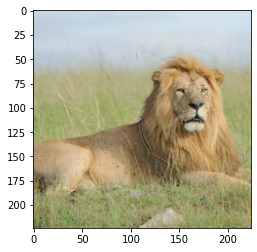

In [7]:
img2 = center_image(img)
plt.imshow(img2);

In [8]:
yhat = resnet50.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

35363/35363 [==============================] - 0s 0us/step


('lion', 0.9735945)

In [9]:
label

[[('n02129165', 'lion', 0.9735945),
  ('n02127052', 'lynx', 0.010467281),
  ('n02125311', 'cougar', 0.0060209916),
  ('n02123394', 'Persian_cat', 0.004735635),
  ('n02129604', 'tiger', 0.0011509217)]]